# $\zeta$-Space of Extreme events
------------------------------------------------
This notebook is an example of the $\zeta$-space application over a synthetic Endogenous and Exogenous event. More information about the p-model is presented in [this article](https://proceedings.sbmac.emnuvens.com.br/sbmac/article/view/2874)

In [1]:
!pip install MFDFA
!pip install git+https://github.com/rsautter/Chi-Space

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Chi-Space to /tmp/pip-req-build-cguux0hz
  Running command git clone -q https://github.com/rsautter/Chi-Space /tmp/pip-req-build-cguux0hz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for Chi-Space: filename=Chi_Space-0.2-py3-none-any.whl size=10939 sha256=520c25633bb0ca643a1e6c723d8e54f32d3edeaf1d26d0ba9fb289577ded1307
  Stored in directory: /tmp/pip-ephem-wheel-cache-yscjxdgp/wheels/11/52/c8/03ed706750385b25afa569b1e10c2025b8705d8eacf48e5f79
Successfully built Chi-Space


In [1]:
import chi
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import tqdm
import seaborn as sns
import pickle

# 1. Generating Endogenous and Exogenous events
-------------------------------------------------------------------

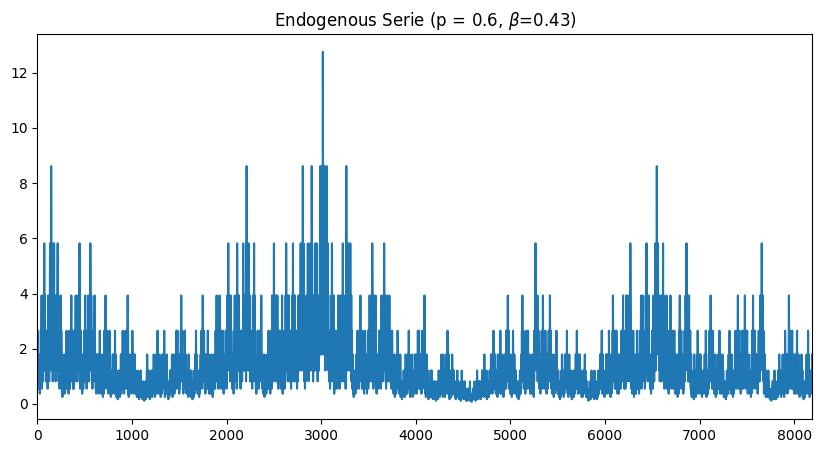

In [2]:
endo, p, beta = chi.generateUniformEndo(2**13)
p,beta = np.round(p,2),np.round(beta,2)
plt.figure(figsize=(10,5))
plt.plot(endo/np.std(endo))
plt.title(r"Endogenous Serie (p = "+str(p)+r", $\beta$="+str(beta)+")")
plt.xlim(0,len(endo))
plt.show()

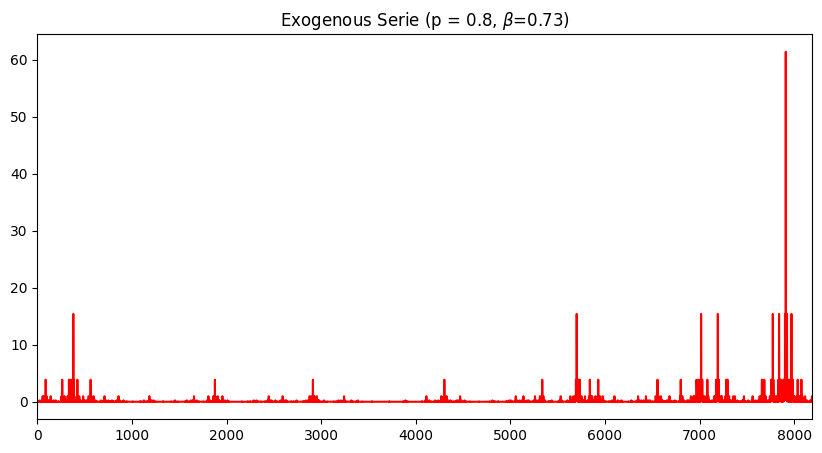

In [3]:
exo, p, beta = chi.generateUniformExo(2**13)
p,beta = np.round(p,2),np.round(beta,2)
plt.figure(figsize=(10,5))
plt.plot(exo/np.std(exo),color='red')
plt.title(r"Exogenous Serie (p = "+str(p)+r", $\beta$="+str(beta)+")")
plt.xlim(0,len(exo))
plt.show()

## 1.1. Paper plot

IndexError: invalid index to scalar variable.

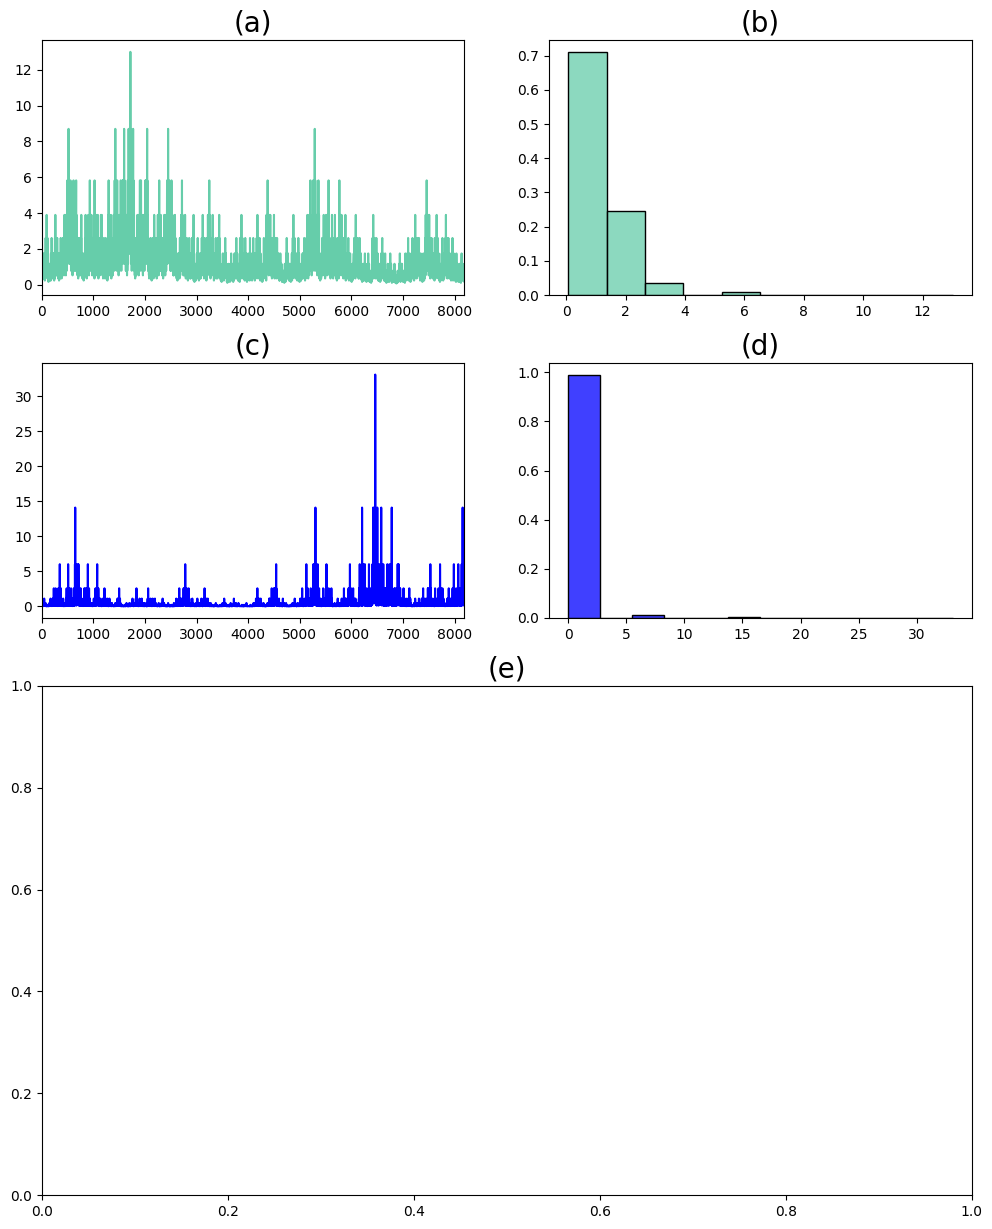

In [4]:
gs = GridSpec(3,2,height_ratios=[1,1,2])

plt.figure(figsize=(12,15))

plt.subplot(gs[0,0])
plt.title("(a)",fontsize=20)
plt.plot(endo/np.std(endo),color='mediumaquamarine')
plt.xlim(0,len(endo))
#plt.xlabel("Time")

plt.subplot(gs[0,1])
plt.title("(b)",fontsize=20)
sns.histplot(endo/np.std(endo),color='mediumaquamarine',bins=10,stat="probability")
plt.ylabel('')

plt.subplot(gs[1,0])
plt.title("(c)",fontsize=20)
plt.plot(exo/np.std(exo),color='blue')
plt.xlim(0,len(endo))
#plt.xlabel("Time")

plt.subplot(gs[1,1])
plt.title("(d)",fontsize=20)
sns.histplot(exo/np.std(exo),color='blue',bins=12,stat="probability")
plt.ylabel('')

plt.subplot(gs[2,:])
plt.title("(e)",fontsize=20)
xa, xfa =chi.getAverageSing(exo/np.std(exo))
plt.plot(xa,xfa, lw=3, color='blue')

a, fa =chi.getAverageSing(endo/np.std(endo))
plt.plot(a,fa, lw=3, color='mediumaquamarine')
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel(r"$f(\alpha)$",fontsize=15)


plt.show()


# 2. Power Spectrum and Singularity Spectrum
-----------------------------------------------------------------

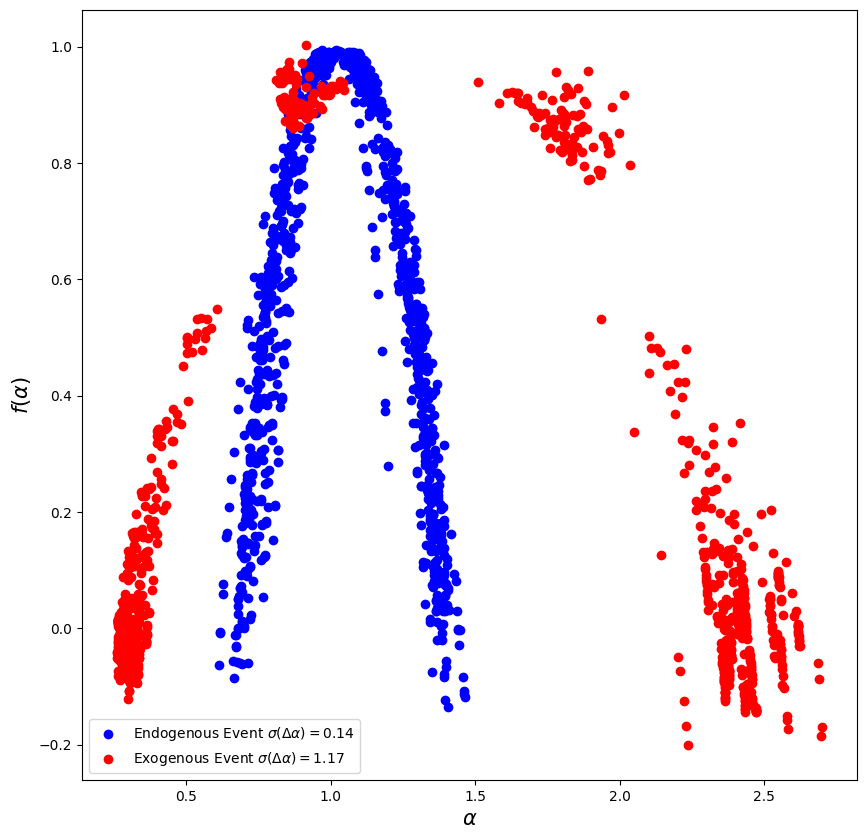

In [4]:
bas, bfas, w  = chi.autoMFDFA(endo)
xbas, xbfas, xw  = chi.autoMFDFA(exo)

plt.figure(figsize=(10,10))
plt.scatter(bas,bfas,color='b',label=r"Endogenous Event $\sigma(\Delta \alpha )=$"+str(np.round(w,2)))
plt.scatter(xbas,xbfas,color='r',label=r"Exogenous Event $\sigma(\Delta \alpha )=$"+str(np.round(xw,2)))  

plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel(r"$f(\alpha)$",fontsize=15)
plt.legend()
plt.show()

In [5]:
print("Endo:")
print(chi.chiSpace(endo))
print("Exo:")
print(chi.chiSpace(exo))

Endo:
{'GQQ': np.float64(0.22277144873135812), 'SC': np.float64(0.14060665505644265)}
Exo:
{'GQQ': np.float64(0.9096185668958618), 'SC': np.float64(1.0811759871277213)}


# $\zeta$-space plot
---------------------------------------------------------------

In [6]:
nSeries = 200
zEndo,sEndo,zExo,sExo = [],[],[],[]

for i in tqdm.tqdm(range(nSeries)):
  exo, p, beta = chi.generateUniformExo(2**13)
  endo, p, beta = chi.generateUniformEndo(2**13)
  zEndo.append(chi.chiSpace(endo,nsamples=10))
  zExo.append(chi.chiSpace(exo,nsamples=10))
  sEndo.append(pickle.dumps(endo))
  sExo.append(pickle.dumps(exo))

zExo = pd.DataFrame(zExo)
zEndo = pd.DataFrame(zEndo)
zEndo["serie"] = sEndo
zExo["serie"] = sExo

100%|██████████| 200/200 [02:57<00:00,  1.13it/s]


In [7]:
zExo.to_csv("zExo.csv")
zEndo.to_csv("zEndo.csv")

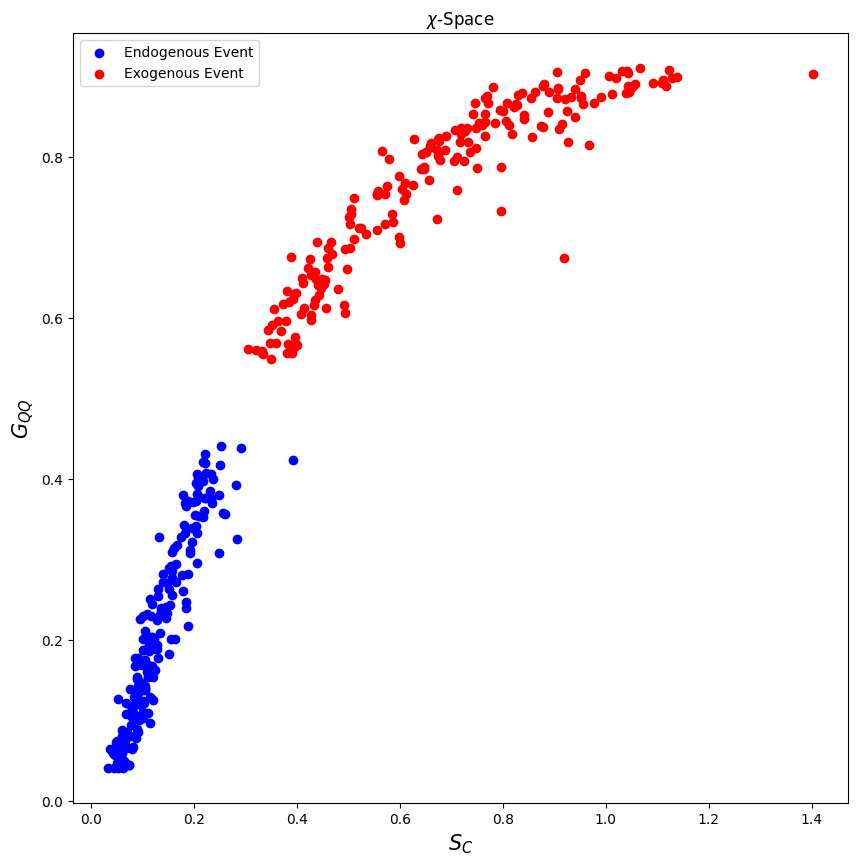

In [9]:
plt.figure(figsize=(10,10))
plt.title(r"$\chi$-Space")
plt.scatter(zEndo['SC'], zEndo['GQQ'],color='blue',label="Endogenous Event")
plt.scatter(zExo['SC'], zExo['GQQ'],color='red',label="Exogenous Event")
plt.xlabel(r"$S_C$",fontsize=15)
plt.ylabel("$G_{QQ}$",fontsize=15)
plt.legend()
plt.show()

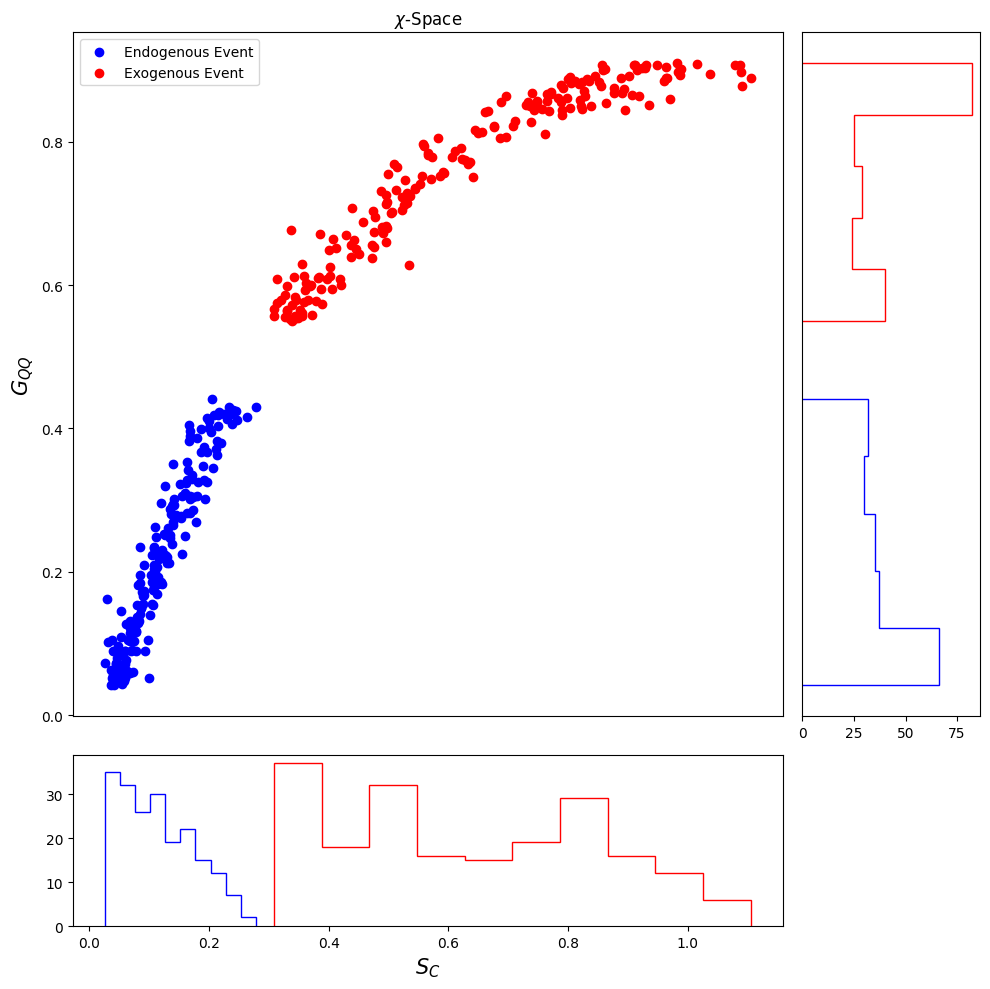

In [9]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(10,10))

gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[4, 1])

plt.subplot(gs[0,0])
plt.title(r"$\chi$-Space")
plt.scatter(zEndo['SC'], zEndo['GQQ'],color='blue',label="Endogenous Event")
plt.scatter(zExo['SC'], zExo['GQQ'],color='red',label="Exogenous Event")
plt.ylabel("$G_{QQ}$",fontsize=15)
plt.xticks([])
plt.legend()

plt.subplot(gs[0,1])
plt.hist(zEndo['GQQ'],color='b',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.hist(zExo['GQQ'],color='r',histtype='step',orientation='horizontal',lw=2.5,bins=5)
plt.yticks([])

plt.subplot(gs[1,0])
plt.hist(zEndo['SC'],color='b',histtype='step',lw=2.5)
plt.hist(zExo['SC'],color='r',histtype='step',lw=2.5)
plt.xlabel(r"$S_C$",fontsize=15)

plt.tight_layout()
plt.show()